# Focusing a Gauss beam

In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_X import Scalar_mask_X
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

In [14]:
from matplotlib import rcParams
rcParams['figure.dpi']=250

## Propagation of a Gauss beam 

When we define the Gauss beam, we define the position of the beam waist, z0, and the the width at focus, w0. In ths case, z0 is the distance from the initial plane:

In [15]:
x0 = np.linspace(-150 * um, 150 * um, 1024)
z0 = np.linspace(-100 * um, 100 * um, 1024)

wavelength = 7.5 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=100 * um, w0=5* um, theta=0 * degrees)

## Vacuum

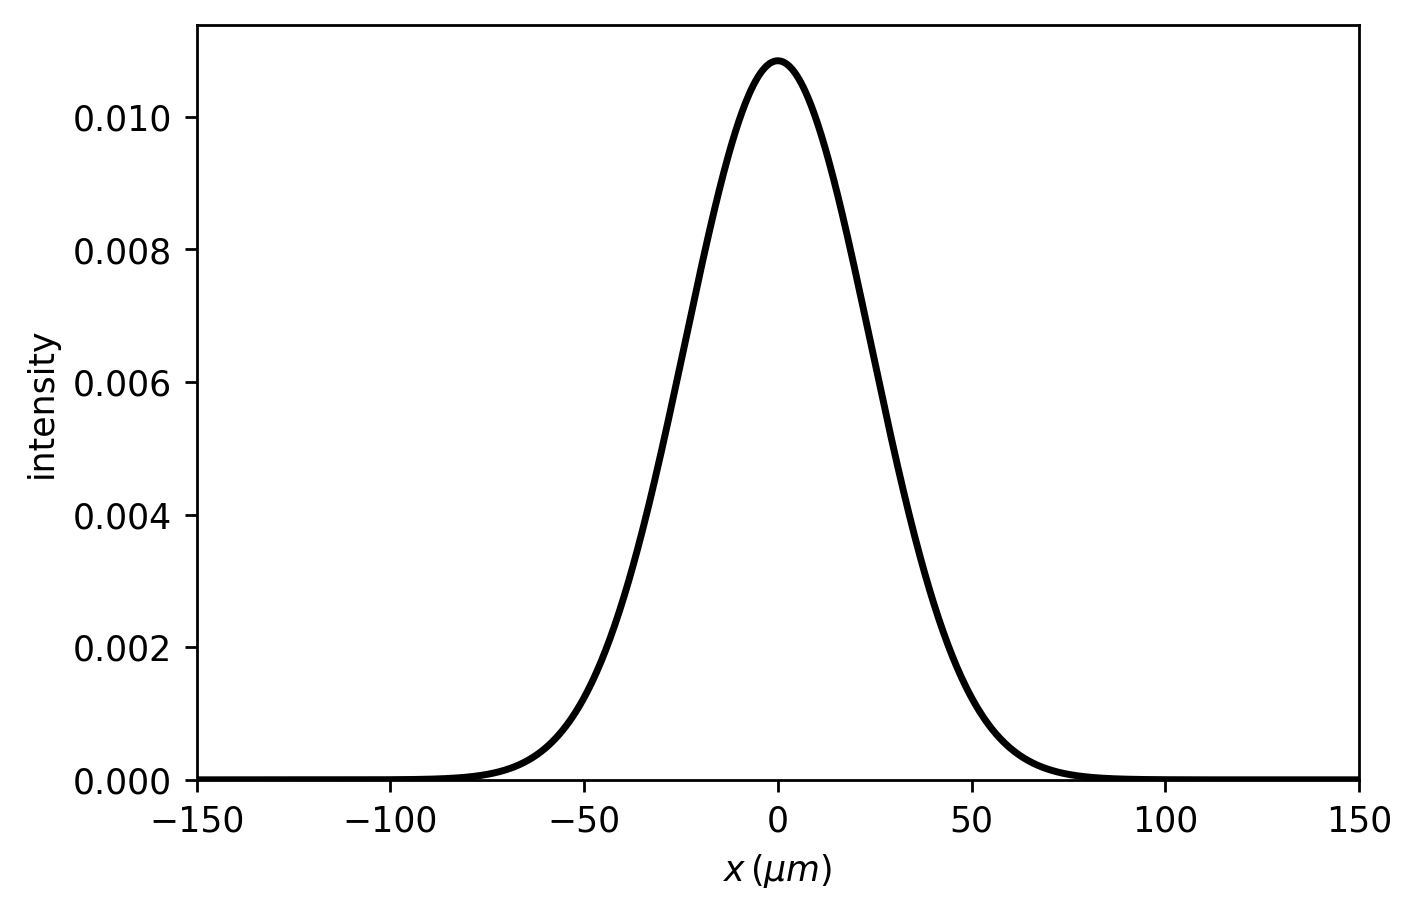

In [16]:
u0.draw()

In [17]:
x0 = np.linspace(-200 * um, 200 * um, 512)
z0 = np.linspace(-100 * um, 100 * um, 512)

wavelength = 10 * um
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.gauss_beam(A=1, x0=0 * um, z0=100 * um, w0=10* um, theta=0 * degrees)

In [18]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)

As we can see, the shape at the incident beam, has not w0=5 um.

In [19]:
u1.WPM(verbose=True)
u1.cut_resample(x_limits=(-50,50),num_points=(512,512))

Time = 0.12 s, time/loop = 0.2327 ms


Let us see the propagation

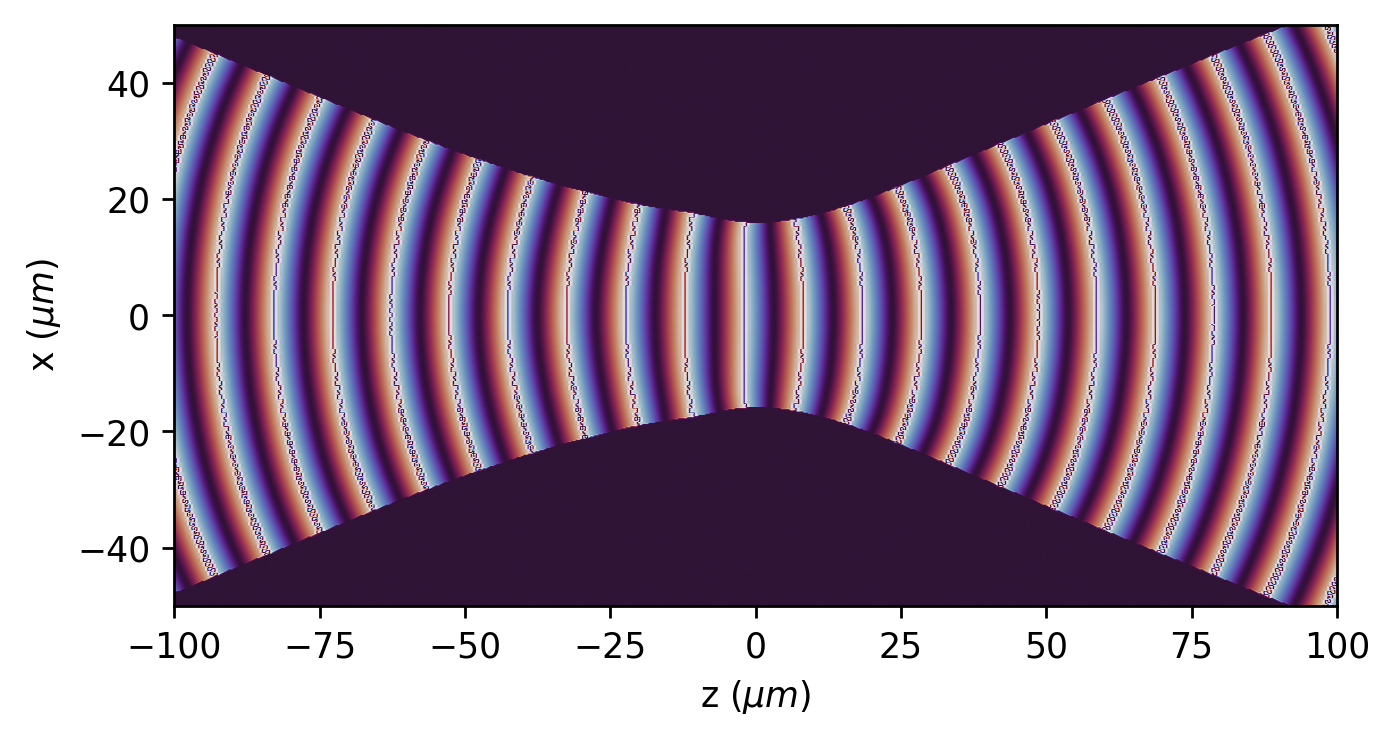

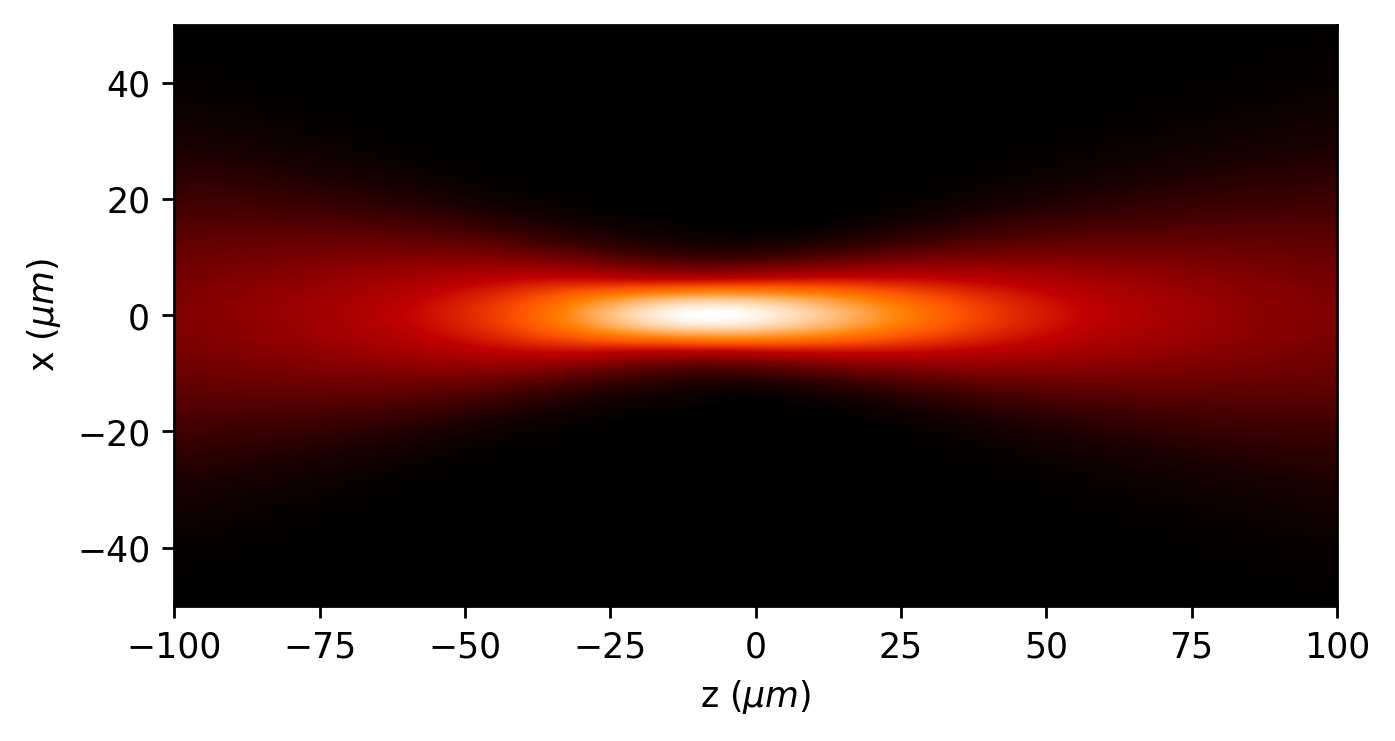

In [20]:
u1.draw(kind='phase', scale='scaled')
u1.draw(kind='intensity', logarithm=1, scale='scaled');

## Layer
When the Gauss beam reaches a layer of dielectric, the wavefront and the beam profile changes

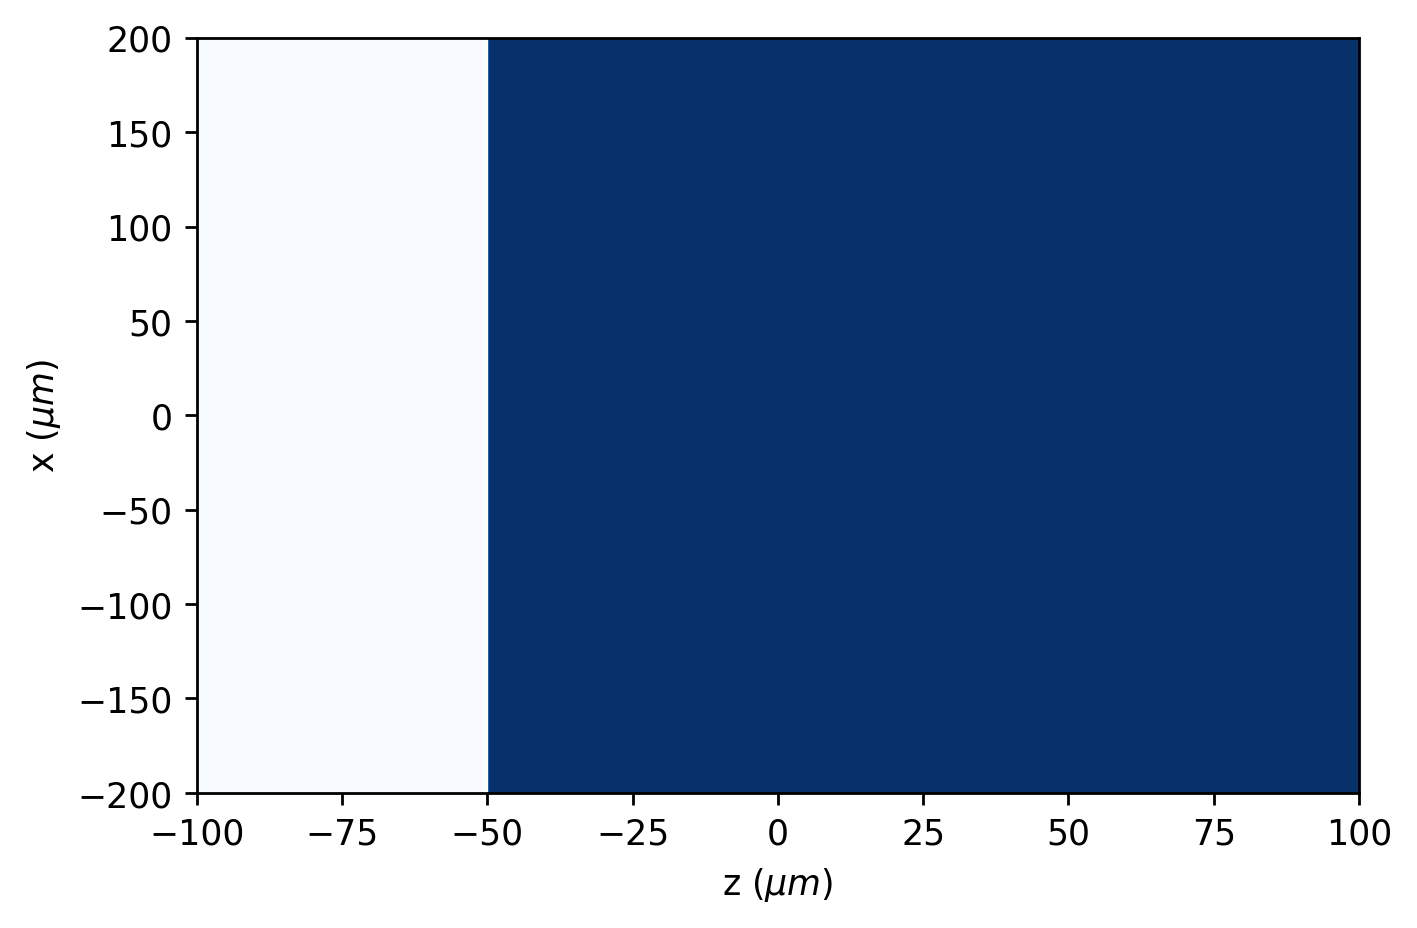

In [21]:
u1 = Scalar_mask_XZ(x=x0, z=z0, wavelength=wavelength, n_background=1)
u1.incident_field(u0)
u1.semi_plane(r0=(0, -50), refraction_index=1.5, angle=0 * degrees)
u1.draw_refraction_index()

In [22]:
u1.WPM(verbose=True)
u1.cut_resample(x_limits=(-50,50),num_points=(512,512))

Time = 0.09 s, time/loop = 0.1695 ms


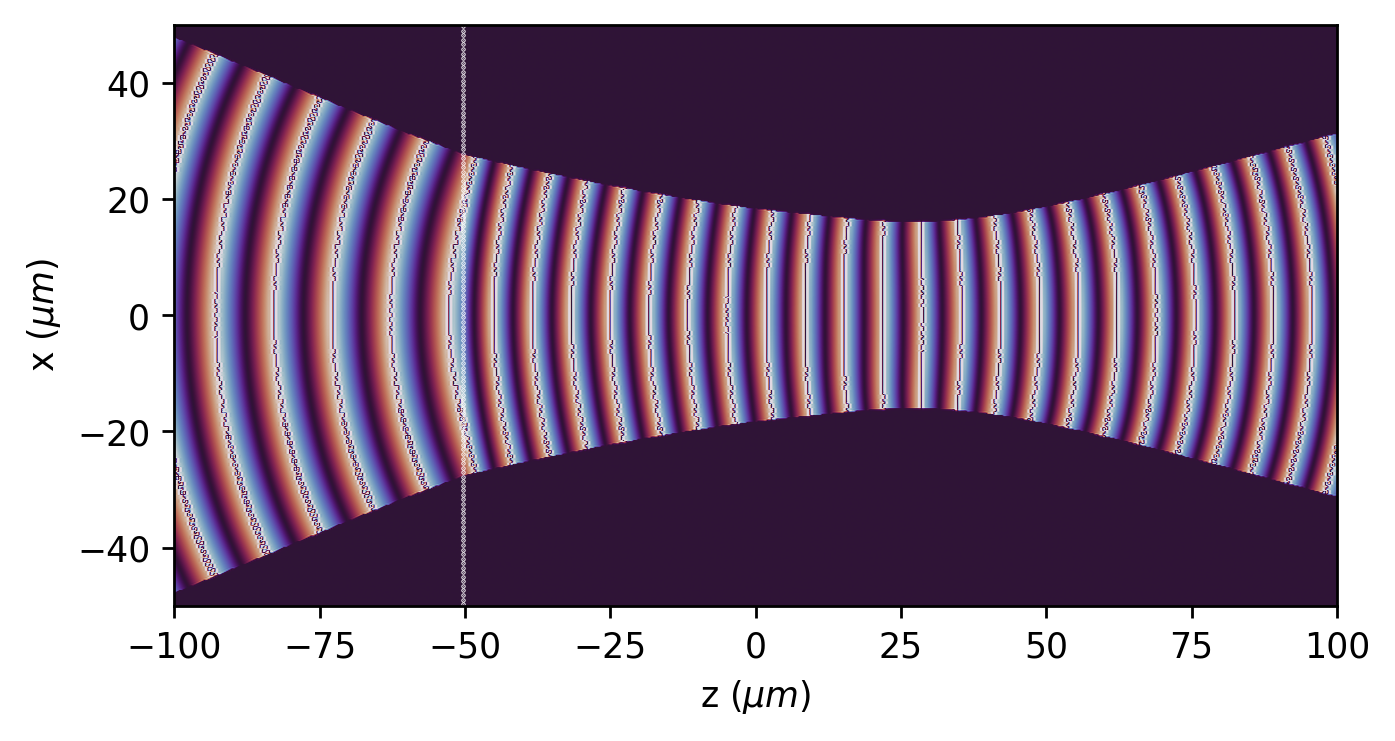

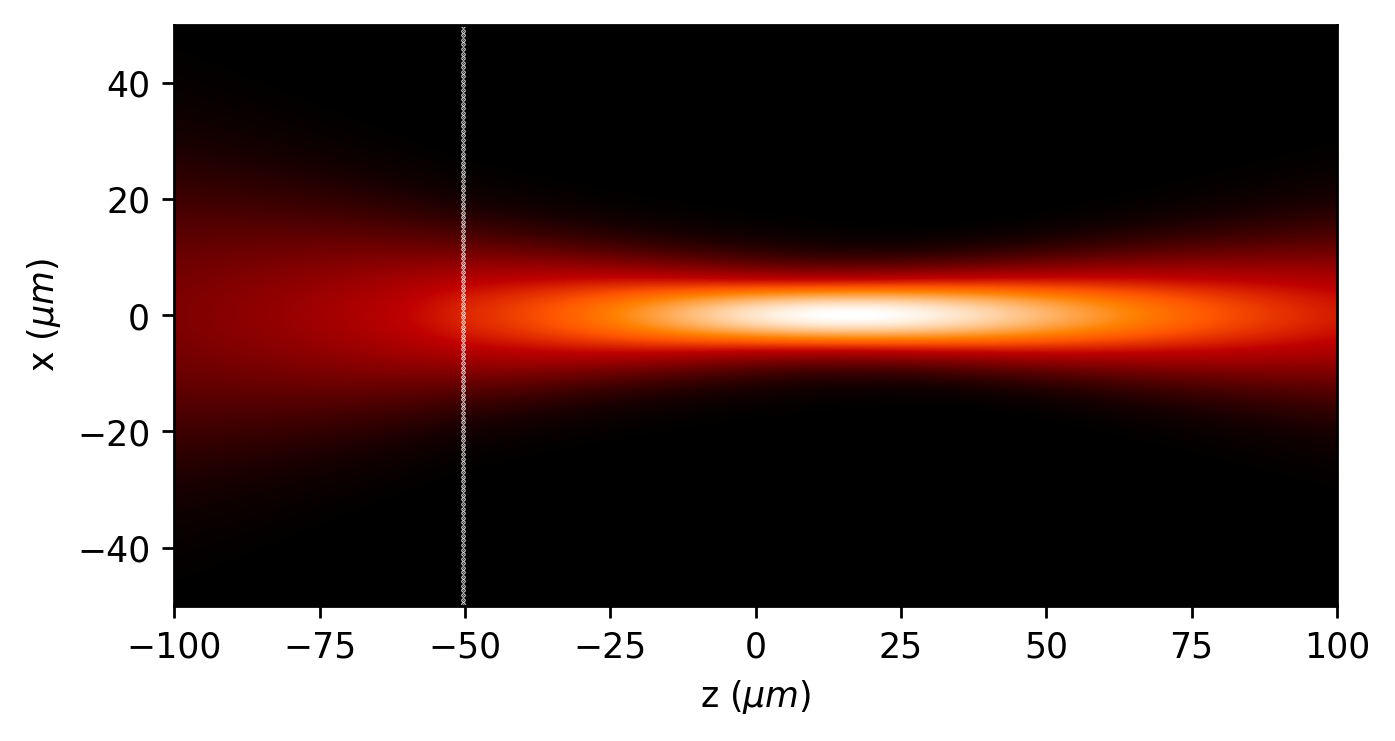

In [23]:
u1.draw(kind='phase', scale='scaled',draw_borders=True)
u1.draw(kind='intensity', logarithm=1, scale='scaled',draw_borders=True);

As can be seen, the beam waist is not at the same position.